In [1]:
# project: p1
# submitter: zdai38
# partner: none

In [2]:
import string
import random
import time
from subprocess import check_output
import json
import os
import pandas as pd
from pandas import DataFrame, Series
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams.update({'font.size': 20})

In [3]:
#q1
git_log = str(check_output(["git", "log"], cwd="repo"))
git_log_list = git_log.split("\\n")

def count_commits(x):
    count = 0
    for i in x:
        if "commit" in i:
            count += 1
    return count

count_commits(git_log_list)

8

In [4]:
#q2 How many commits were there by each author?
def count_commits_by_author(git_log_list):
    result = {}
    for i in git_log_list:
        if i != "":
            word = i.split()
            if word[0] == "Author:":
                if(word[1] not in result):
                    result[word[1]] = 1
                else:
                    result[word[1]] += 1
    return result

commits_by_author = count_commits_by_author(git_log_list)
commits_by_author

{'Steve': 3, 'Ada': 3, 'Linus': 2}

Text(0, 0.5, 'Commit Count')

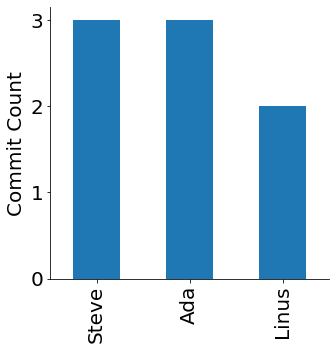

In [5]:
#q3 How many commits did each developer contribute?
s1 = Series(commits_by_author)

def get_ax():
    ax = plt.subplot()
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    None
    return ax
ax = get_ax()    
ax = s1.plot.bar(figsize=(5,5))
ax.set_ylabel("Commit Count")


In [6]:
#q4: How has the size of the wc.py code grown over time?
def get_commit(git_log_list):
    result_list = []
    for i in git_log_list:
        if "commit" in i:
            start_position = i.find("commit") + len("commit ")
            result_list.insert(0, i[start_position:])
    return result_list

commit_list = get_commit(git_log_list)
commit_list

def size_code(commit_list):
    result = []
    for i in commit_list:
        check_output(["git", "checkout", i], cwd="repo")
        with open(os.path.join("repo","wc.py"), "r") as file: 
            data = file.readlines() 
        result.append(len(data))
    return result

size_list = size_code(commit_list)
size_list

[21, 35, 35, 39, 40, 40, 40, 43]

Text(0, 0.5, 'Commit Count')

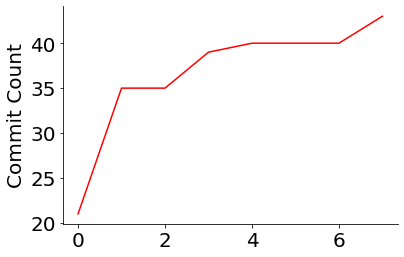

In [7]:
#q5 [PLOT]: How has the size of the wc.py code grown over time?
s2 = Series(size_list)

ax = get_ax()    
ax = s2.plot.line(figsize=(6,4),color="red")
ax.set_ylabel("Commit Count")

In [8]:
# test inputs to exercise wc.py

# expected result: {'X': 1, 'Y': 1, 'Z': 1}
test1 = """X Y Z"""

# expected result: 
test2 = """A B
A C
"""

# expected result: {'A': 2, 'B': 1, 'C': 1}
test3 = """A B
a c
"""

In [9]:
def run_wc(body, commit=None):
    with open(os.path.join("repo","test.txt"), "w") as f:  
        f.write(body)
    if commit != None:
        check_output(["git", "checkout", commit], cwd="repo")
    else:
        check_output(["git", "checkout", "master"], cwd="repo")
    try:
        return json.loads(check_output(["python3", "wc.py", "test.txt", "ALL"], cwd="repo", universal_newlines=True))
    except:
        return None

In [10]:
#q6
run_wc(test1)

{'X': 1, 'Y': 1, 'Z': 1}

In [11]:
#q7
run_wc(test3)

{'A': 2, 'B': 1, 'C': 1}

In [12]:
def get_author(git_log_list):
    author_list = []
    for i in git_log_list:
        if "Author: " in i:
            author_list.insert(0, i.split()[1])
    return author_list

author_list = get_author(git_log_list)
author_list

['Ada', 'Linus', 'Linus', 'Ada', 'Steve', 'Ada', 'Steve', 'Steve']

In [13]:
def test_table(body, expected):
    test = []
    for i in commit_list:
        if run_wc(body, i) == expected:
            test.append(True)
        else:
            test.append(False)
    df = DataFrame({"commit": Series(commit_list), "author": Series(author_list), "pass": Series(test)})
    return df

In [14]:
#q8
test_table(test1, {'X': 1, 'Y': 1, 'Z': 1})

,commit,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,Linus,True
2,761627a3ad9ee681f27211326e9149f01764ceee,Linus,True
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,Steve,True


In [15]:
#q9: What does test_table(test2, {'A': 2, 'B': 1, 'C': 1}) return?
test_table(test2, {'A': 2, 'B': 1, 'C': 1})

,commit,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,Linus,False
2,761627a3ad9ee681f27211326e9149f01764ceee,Linus,True
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,Steve,True


In [16]:
#q10: What does test_table(test3, {'A': 2, 'B': 1, 'C': 1}) return?
test_table(test3, {'A': 2, 'B': 1, 'C': 1})
# test3 as input is most useful for evaluating the wc.py program

,commit,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,Linus,False
2,761627a3ad9ee681f27211326e9149f01764ceee,Linus,False
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,Steve,True


In [17]:
versions = {
    "v0-baseline": "6f5ca9327e986315ffcacddce5d9d6195c0913b7",
    "v1-open-once": "f37e610ce055a3d894baac2d9449e6eb77c72320",
    "v2-pass-per-uniq": "c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5",
    "v3-single-pass": "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4",
}

In [18]:
def time_run_sec(uniq_words, total_words, word_size=6, commit=None):
    random_words = []
    letters = list(string.ascii_lowercase)
    for i in range(uniq_words):
        word = ""
        for j in range(word_size):
            word += random.choice(letters)
        if word not in random_words:
            random_words.append(word)
    
    input_str = ""
    for i in range(total_words):
        input_str += (random.choice(random_words)+" ")
    
    t0 = time.time()
    run_wc(input_str, commit)
    t1 = time.time()
    return t1-t0

In [19]:
def plot_series(inp,uniq):
    time_spend = {}
    for i in versions:
        time_spend[i] = time_run_sec(uniq_words=uniq,total_words=inp,commit=versions[i])*1000
    return Series(time_spend).sort_values()

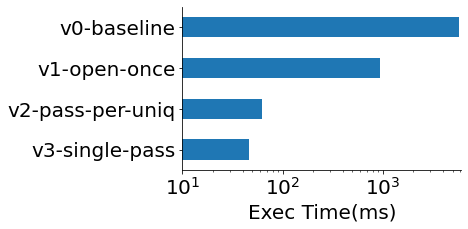

In [20]:
#q11
s11 = plot_series(5000,100)
ax = get_ax()
ax = s11.plot.barh(figsize=(5, 3),xlim=10)
ax.set_xscale('log')
ax.set_xlabel("Exec Time(ms)")
None

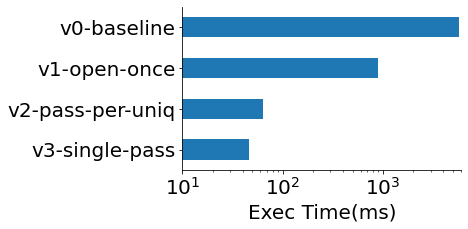

In [21]:
#q12: How long does each version take for 5000-word inputs consisting of 1 unique word?
s12 = plot_series(5000,100)
ax = get_ax()
ax = s12.plot.barh(figsize=(5, 3),xlim=10)
ax.set_xscale('log')
ax.set_xlabel("Exec Time(ms)")
None
# v3 version does better than the v2 version when there are less unique words.

In [22]:
def complexity_table(commit):
    df = DataFrame({
        },
        index=[1000,2000,5000,10000]
    )
    per = [10,5,1]
    total = [1000,2000,5000,10000]
    for i in per:
        x = []
        for j in total:
            x.append(time_run_sec(uniq_words = int(i*j/100), total_words = j, commit=versions[commit]))
        df[i] = x
    return df

table_v2 = complexity_table("v2-pass-per-uniq")
table_v3 = complexity_table("v3-single-pass")    

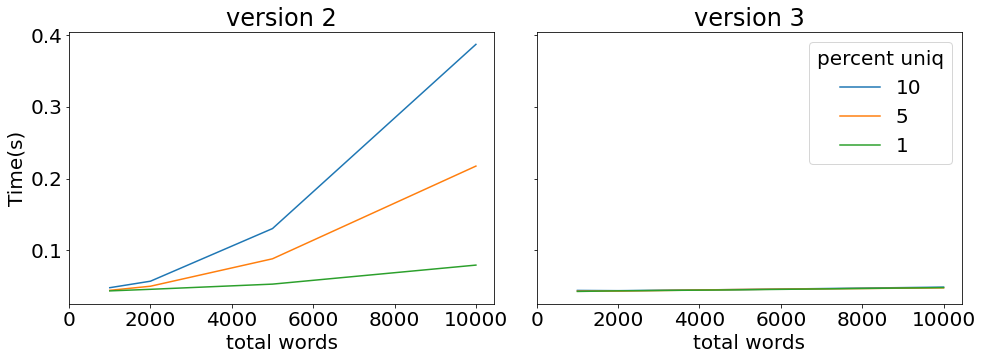

In [23]:
#q13 [PLOT]: How does the number of total words and unique percent affect the performance of versions 2 and 3?
def plot_pair():
    t = plt.subplots(ncols=2, figsize=(16,5),sharex=True, sharey= True)
    plt.subplots_adjust(wspace=0.1)
    return list(t[1])


ax = plot_pair()

#plot 1
table_v2.plot.line(ax=ax[0],legend=False, title= "version 2",xlim=0)
ax[0].set_ylabel('Time(s)')
ax[0].set_xlabel('total words')

#plot 2
table_v3.plot.line(ax=ax[1], title= "version 3")
ax[1].set_xlabel('total words')
ax[1].legend(loc="upper right",title = "percent uniq" )

None

In [24]:
class Commit:
    def __init__(self, commit_hex, author, message):
        self.commit_hex = commit_hex
        self.author = author
        self.message = message
        
    def __repr__(self):
        return f"{self.commit_hex}[{self.author}]: {self.message}"   
    
class Repo:
    def __init__(self):
        self.list = []

    def commit(self, commit_hex, author, message):
        x = Commit(commit_hex, author, message)
        self.list.append(x)
        return x
    
    def added(self):
        self.list.append(self)
        
    def __repr__(self):
        return f"{self.commit_hex}[{self.author}]: {self.message}"  
    
    def __getitem__(self, lookup):
        if type(lookup) != int:
            key = lookup.strip().upper()
            for i in range(len(self.list)):
                if key in str(repo[i]):
                    return repo[i]
        elif lookup < 0:
            return self.list[len(self.list) + lookup]
        else:
            return self.list[lookup]

In [25]:
#q14
repo = Repo()
c1 = repo.commit("A39DE2", "Aarushi", "created the repo")
c2 = repo.commit("D1E9C5", "Ben", "wrote some code")
c3 = repo.commit("AA0912", "Emma", "added a readme")
c4 = repo.commit("B143D0", "Hunter", "made some tests")
c5 = repo.commit("F0148D", "Jaime", "fixed a bug")
c6 = repo.commit("B978EE", "Wendy", "optimized the code")
c1.commit_hex, c2.author, c3.message, c4.commit_hex, c5.author, c6.message

('A39DE2', 'Ben', 'added a readme', 'B143D0', 'Jaime', 'optimized the code')

In [26]:
#q15
str(c1), str(repo[1]), str(repo[-1])

('A39DE2[Aarushi]: created the repo',
 'D1E9C5[Ben]: wrote some code',
 'B978EE[Wendy]: optimized the code')

In [27]:
#q16
str(repo["F0148D"]), str(repo["b143d0"]), str(repo["  AA0912  "])

('F0148D[Jaime]: fixed a bug',
 'B143D0[Hunter]: made some tests',
 'AA0912[Emma]: added a readme')